# pavan 

# Airlines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy .spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
df = pd.read_table(r'D:\data science\data science assg\assg.7 clustering\Airlines.txt')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.drop(['ID#'],inplace=True,axis=1)

In [5]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


C:\Users\91832\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


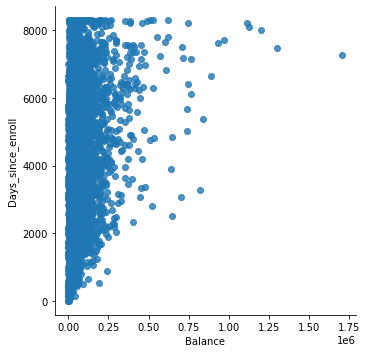

In [6]:
sns.lmplot('Balance','Days_since_enroll', data=df,fit_reg=False)

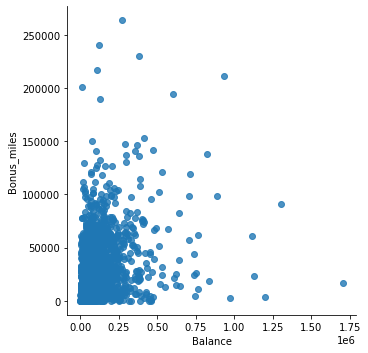

In [7]:
sns.lmplot('Balance','Bonus_miles',data=df,fit_reg=False)

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(df.iloc[:,1:])

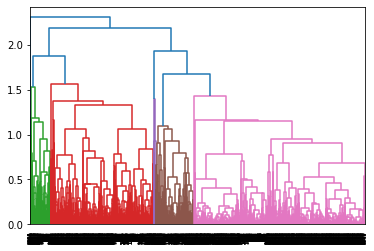

In [11]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [12]:
sd = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [13]:
sd


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [15]:
y_sd = sd.fit_predict(df_norm)
Clusters=pd.DataFrame(y_sd,columns=['Clusters'])

In [16]:
df_norm['h_clusterid'] = sd.labels_
df_norm.iloc[:,:4].groupby(df_norm.h_clusterid).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles
h_clusterid,,,,
0,0.021547,0.417233,0.003739,0.004589
1,0.002894,0.000000,0.741935,0.000000
2,0.007937,0.178099,0.000201,0.002206
3,0.031127,0.375000,0.000000,0.000000


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(df_norm['h_clusterid'],sd.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00      2493
           3       1.00      1.00      1.00         4

    accuracy                           1.00      3999
   macro avg       1.00      1.00      1.00      3999
weighted avg       1.00      1.00      1.00      3999



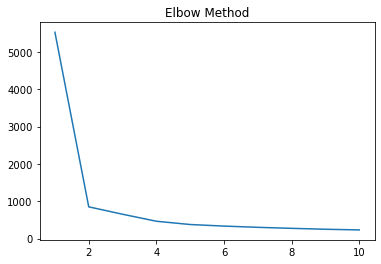

In [18]:
wcss=[]
for i in range (1,11):
    Kmean = KMeans(n_clusters=i,random_state= 0)
    Kmean.fit(df_norm)
    wcss.append(Kmean.inertia_)
plt.plot(range(1,11),wcss)
plt.title ('Elbow Method')
plt.show()

In [19]:
model = KMeans(2,random_state=42)
model.fit(df_norm)

KMeans(n_clusters=2, random_state=42)

In [20]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
df['cluster_new']=model.labels_

In [22]:
df.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59922.338620,88.013878,1.706582,1.013878,1.008723,10315.566217,9.238303,257.590801,0.729580,3818.082078,0.001586
1,1,96958.409614,239.907244,2.662153,1.015572,1.018280,28805.945836,15.637779,805.767773,2.473257,4631.628978,1.000000
